## Indian Start-up Funding Analysis


### Project Scenario
The Team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, I was tasked to:

- Investigate the ecosystem and propose the best course of action.
  - Analyze funding received by start-ups in India from 2018 to 2021.
  - Separate data for each year of funding will be provided.
  - Find the start-ups’ details, the funding amounts received, and the investors' information.

### Objective
To analyze funding trends and dynamics within the Indian start-up ecosystem from 2018 to 2021 and propose strategic recommendations for the team's venture.


### Business Questions
####
1.What sectors have shown the highest growth in terms of funding received over the past four years?

2.What geographical regions within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

3.Are there any notable differences in funding patterns between early-stage startups and more established companies?

4.Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India and what factors contribute to this?

5.Which investors have more impact on startups over the years?

6.What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

## Hypothesis Testing

#### 
Null Hypothesis(Ho): There is no significant difference in the amount of funding between startups in Bangalore.
#### 
Alternative Hypothesis(Ha): There is a significant difference in the amount of funding between startups in Bangalore.

In [1]:
# Install necessary packages

%pip install pandas pyodbc python-dotenv requests




[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                      
import re     
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat 
import geopandas as gpd
import geoplot as gplt
import folium
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.subplots import go
from matplotlib.ticker import FuncFormatter
import squarify
from folium.plugins import MarkerCluster
from scipy import stats        
from geopy.geocoders import Nominatim    
# from scipy.stats import ttest_ind   
from scipy.stats import mannwhitneyu 
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


### First Data Set
The first data was from a database management system, that is MIRCORSOFT SQL SERVER. Connection was made to the database using an Open Database Connectivity standard library, pyodbc. <br>
Two tables were read from the databases. That is, <br>
Table 1: dbo.LP1_startup_funding2020 <br>
Table 2: dbo.LP1_startup_funding2021


In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [4]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [5]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
connection = pyodbc.connect(connection_string)

In [6]:
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table.
query = "Select * from dbo.LP1_startup_funding2020"
table_1 = pd.read_sql(query, connection)


In [7]:
query = "Select * from dbo.LP1_startup_funding2021"
table_2 = pd.read_sql(query, connection)

In [8]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [9]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [10]:
table_1.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [11]:
table_1[table_1['column10'].notna()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


#### Drop column10 in table_1 since it has just two values that are not null and are also just repetition of values in Stage column 

In [12]:
# Drop column10
table_1.drop('column10', axis=1, inplace=True) if 'column10' in table_1.columns else table_1
table_1.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed


In [13]:
# Function to clean the column names

def stripper(string: str, strip: list) -> str:
    """Strips a strip list from a given string and returns the string"""
    for s in strip:
        string = string.replace(s, '')
        
    return string
    
def replacer(string: str, replace: list) -> str:
    """Replaces each character in replace list with underscore given a string and returns the string"""
    for r in replace:
        string = string.replace(r, '_')
                
    return string
    
def clean_column_names(df):
    strip   = ['(', ')', '$']
    replace = [' ', '/'] 
    df.columns = [replacer(stripper(col_name.lower(), strip), replace) for col_name in df.columns]
    return df


In [14]:
# Clean the column names
table_1 = clean_column_names(table_1)
table_2 = clean_column_names(table_2)

In [15]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1055 non-null   object 
 1   founded        842 non-null    float64
 2   headquarter    961 non-null    object 
 3   sector         1042 non-null   object 
 4   what_it_does   1055 non-null   object 
 5   founders       1043 non-null   object 
 6   investor       1017 non-null   object 
 7   amount         801 non-null    float64
 8   stage          591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [16]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1209 non-null   object 
 1   founded        1208 non-null   float64
 2   headquarter    1208 non-null   object 
 3   sector         1209 non-null   object 
 4   what_it_does   1209 non-null   object 
 5   founders       1205 non-null   object 
 6   investor       1147 non-null   object 
 7   amount         1206 non-null   object 
 8   stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


### Create year column to identify each dataset

In [17]:
# Table 1: dbo.LP1_startup_funding2020
table_1['year'] = 2020

# Table 2: dbo.LP1_startup_funding2021
table_2['year'] = 2021

### First Data Set



In [18]:
# First Data set
first_dataset = pd.concat([table_1, table_2], ignore_index=True)

first_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2264 non-null   object 
 1   founded        2050 non-null   float64
 2   headquarter    2169 non-null   object 
 3   sector         2251 non-null   object 
 4   what_it_does   2264 non-null   object 
 5   founders       2248 non-null   object 
 6   investor       2164 non-null   object 
 7   amount         2007 non-null   object 
 8   stage          1372 non-null   object 
 9   year           2264 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 177.0+ KB


### Second Data Set

In [19]:
# Load dataset
second_dataset = pd.read_csv('DataSets/startup_funding2019.csv')

second_dataset = clean_column_names(second_dataset)

second_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  89 non-null     object 
 1   founded        60 non-null     float64
 2   headquarter    70 non-null     object 
 3   sector         84 non-null     object 
 4   what_it_does   89 non-null     object 
 5   founders       86 non-null     object 
 6   investor       89 non-null     object 
 7   amount         89 non-null     object 
 8   stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


### Third Data Set

In [20]:
# Load dataset
third_dataset = pd.read_csv('DataSets/startup_funding2018.csv')

third_dataset = clean_column_names(third_dataset)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_name   526 non-null    object
 1   industry       526 non-null    object
 2   round_series   526 non-null    object
 3   amount         526 non-null    object
 4   location       526 non-null    object
 5   about_company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [21]:
# Fix location values, take every letter before the first comma as headquarter
third_dataset['location'] = [location.split(',')[0] for location in third_dataset['location']]


In [22]:
# Rename round_series to stage and location to headquarter
third_dataset.rename(columns={
    'company_name': 'company_brand', 
    'industry': 'sector', 
    'round_series': 'stage', 
    'about_company': 'what_it_does', 
    'location': 'headquarter'
    },
    inplace=True
)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_brand  526 non-null    object
 1   sector         526 non-null    object
 2   stage          526 non-null    object
 3   amount         526 non-null    object
 4   headquarter    526 non-null    object
 5   what_it_does   526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


### Create Year column to identify each dataset


In [23]:
# Create year column

# The second data is a flat-file name startup_funding2019.csv
second_dataset['year'] = 2019

# The third part of the data flat-file named startup_funding2018.csv
third_dataset['year']  = 2018

### Create the final concatenated dataset

In [24]:
# Final Data set
final_dataset = pd.concat([first_dataset, second_dataset, third_dataset], ignore_index=True)

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.0+ KB


In [25]:
final_dataset.head(5)

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


### Cleaning Columns

- Headquarter & Sector column
    - If column value contains '#REF!', clean it and shift the row starting from that column by 1 step and until the stage column
    - Sanitize sector column if after cleaning and shifting, but the sector value is also present among unique values of the headquarter column
    - Fixes index 1297, 1312, 2155

In [26]:
# Function to remove '#REF!' in a series
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', '').strip()
            
    return value

# Columns of Interest 
columns = ['headquarter', 'investor']
for column in columns:    
    # Identify rows where column value contains '#REF!
    mask = final_dataset[column].str.contains('#REF!')
    
    # Fill missing values in mask with False
    mask.fillna(False, inplace=True)
    
    # Update the column by applying the remove_ref function to the column
    final_dataset.loc[mask, column] = final_dataset.loc[mask, column].apply(remove_ref)
    
    # Shift values in selected rows excluding the last column 'year'
    final_dataset.loc[mask, column:'stage'] = final_dataset.loc[mask, column:'stage'].shift(1, axis=1)


# Sanitisizing the sector column after shifting
mask = final_dataset['sector'].apply(lambda x: x in final_dataset['headquarter'].unique())

# Update 'headquarter' value with 'sector' value
final_dataset.loc[mask, 'headquarter'] = final_dataset.loc[mask, 'sector']

# Set the 'sector' value to NaN
final_dataset.loc[mask, 'sector'] = np.nan          

#### Replace 'None' string values with NaN element-wise allowing for consistent representation of missing values

In [27]:
# Function replace None with NaN
def replace_none(value):
    if isinstance(value, str) and (value.lower() == 'none' or value.lower() == 'nan'):
        value = np.nan
    
    return value

# Apply the function to all columns
final_dataset = final_dataset.applymap(replace_none) # element-wise

In [28]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2751 non-null   object 
 3   sector         2781 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2252 non-null   object 
 7   amount         2623 non-null   object 
 8   stage          1945 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.0+ KB


#### If a value in stage column is a website link, its correct value is NaN

**Website link in stage column is https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593**

In [29]:
# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'
    
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [30]:
# Remove website link values from the stage column
final_dataset['stage'] = final_dataset['stage'].apply(remove_website_link)

#### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [31]:
# Function to clean amount values
def floater(string):
    try:
        string = float(string)
    except ValueError:
        string = np.nan
    
    return string
    
def clean_amount(row): 
    amount = row[0]    
    year   = row['year'] 
    
    # Source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/
    exchange_rates = {
        2018: 0.014649,
        2019: 0.014209,
        2020: 0.013501,
        2021: 0.013527
    }
    
    exchange_rate = exchange_rates[year]   
    
    # Convert to string
    amount = str(amount)   
    
    if isinstance(amount, str):        
        # Set of elements to replace
        to_replace = {' ', ','}

        # Replace each element in the set with an empty string
        for r in to_replace:
            amount = amount.replace(r, '')        
                        
        if amount == '' or amount == '—': 
            amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of the year
        elif '₹' in amount:
            amount = amount.replace('₹', '')
            amount = floater(amount) * exchange_rate
        
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)

    
    return amount

In [32]:
final_dataset.isna().sum()

company_brand      0
founded          769
headquarter      128
sector            98
what_it_does       0
founders         545
investor         627
amount           256
stage            935
year               0
dtype: int64

##### If the investor value is a number or contains $, the correct value for amount if missing is the investor value, the correct value for stage is the old amount value and the investor value becomes NaN or missing

In [33]:
# Identify rows where 'investor' value is numeric using clean amount function
mask = final_dataset[['investor', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = final_dataset['stage'].isna()
final_dataset.loc[mask & stage_mask, 'stage']    = final_dataset.loc[mask, 'amount']

# Update 'amount' column with 'investor' value
final_dataset.loc[mask, 'amount']                = final_dataset.loc[mask, 'investor']

# Set 'investor' to NaN
final_dataset.loc[mask, 'investor']              = np.nan

##### If the 'stage' value is a number or contains $, the column 'what_it does' becomes its old value concatenated with the value in the 'founder' column. The correct value for 'founder' is the 'investor' value and the correct value for 'investor' is the 'amount' value and correct 'amount' becomes the old 'stage' value while the correct value for 'stage' is NaN or missing. 


In [34]:
# Identify rows where 'stage' value is numeric using clean amount function
mask = final_dataset[['stage', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update the 'what_it_does' column to its concatenation with 'founder' value
old_what_it_does = final_dataset.loc[mask, 'what_it_does']
old_founder      = final_dataset.loc[mask, 'founders']

final_dataset.loc[mask, 'what_it_does']    = old_what_it_does.fillna('') + ' ' + old_founder.fillna('')

# Update 'founder' column using the old 'investor' value
final_dataset.loc[mask, 'founders']        = final_dataset.loc[mask, 'investor']

# Update 'investor' column using the old 'amount' value
final_dataset.loc[mask, 'investor']        = final_dataset.loc[mask, 'amount']

# Update 'amount' column using the old 'stage' value
final_dataset.loc[mask, 'amount']          = final_dataset.loc[mask, 'stage']

# Set 'stage' to NaN
final_dataset.loc[mask, 'stage']           = np.nan

#### Clean and convert amounts to USD and rename colume from amount to amount($)

In [35]:
# Clean and convert amounts to USD considering the average exchange rate per year
final_dataset['amount'] = final_dataset[['amount','year']].apply(lambda row: clean_amount(row), axis=1)

In [36]:
final_dataset.rename(columns={'amount': 'amount($)'}, inplace=True)

#### Cleaning the Headquarter Column

In [37]:
# Fix headquarter values, take every word before the first comma as headqurter
def splitter(value):
    """
    Splits a string by comma and returns the first part.

    Args:
        value (str or None): The value to be split.

    Returns:
        str or None: The first part of the string before the first comma, or the original value if the input is not a string.
    """
    return value.split(',')[0] if isinstance(value, str) else value

final_dataset['headquarter'] = [splitter(hq) for hq in final_dataset['headquarter']]

#### Cleaning the Sector Column

In [38]:
# Refactoring
def heal_column_from_chars(df: pd.DataFrame, column: str = 'sector', chars: list = [',', ' ', '&', 'and', '/']) -> pd.DataFrame:
    """
    Returns a dataframe with the sector column having the least redundant value for sector.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to clean.
        column (str): The name of the column to clean. Defaults to 'sector'.
        chars (list): A list of characters or substrings to handle. Defaults to [',', ' ', '&', 'and', '/']. 
                      Always start with ',' because comma separated sector the most occuring multiple sector value.   
        
    Returns:
        pd.DataFrame: The DataFrame with the specified column cleaned.
    """
    
    def count_char(value, char):
        """
        Finds all occurrences of char in value and returns the count.
        
        Parameters:
            value (str): The string in which to search for occurrences of char.
            char (str): The character to count occurrences of.
        
        Returns:
            int: The count of occurrences of char in value.
        """
        # Use re.findall to find all occurrences of char in value and return the count
        return len(re.findall(re.escape(char), str(value)))
    
    def char_to_nochar_value(char_value, char, no_char_column):
        """
        Find the equivalent value of char_value in no_char_column.
        
        Parameters:
            char_value (str): The string to process.
            char (str): The character to split the char_value string.
            no_char_column (pd.Series): The column containing unique values to search for the equivalent value.
        
        Returns:
            str: The equivalent value found in no_char_column.
        """
        
        # Default no char value        
        no_char_value = char_value 
        
        # Split by char, if char='and', "Food and Beverage" = ["Food ", " Beverage"]
        char_value    = char_value.split(char) 
        
        # After, char_value is split, update no char_value
        no_char_value = char_value[0]
        other_value = ''
            
        def find_index(where, value):
            """
            Find the index where the given value matches the elements in the Series 'where'.
            
            Parameters:
                where (pd.Series): The Series containing strings to search for the value.
                value (str): The value to search for.
            
            Returns:
                np.ndarray: The array of indices where the value matches in the Series.
            """
            return np.where(where.str.lower().unique() == value.strip(char).lower())[0]
            
        for value in char_value: 
            other_value = other_value + char + value
            # Find the index of value in unique no_char_column
            indexof_value = find_index(where=no_char_column, value=value)
            
            # Find the index of other value in unique no_char_column
            indexof_othervalue = find_index(where=no_char_column, value=other_value)
            
            if indexof_value.size == 1:
                # If a unique match is found, update no_char_value
                no_char_value = value              
                break
            elif indexof_othervalue.size == 1:  
                # If a unique match is found, update no_char_value
                no_char_value = other_value              
                break
            else:
                pass
                
        return no_char_value
        
    for char in chars: 
                
        char_list = [count_char(value, char) for value in df[column]]
                
        char_threshold =  0

        mask_char      = [x > char_threshold for x in char_list]    # Mask Boolean

        mask_no_char   = [not x for x in mask_char]
        
        char_column    = df.loc[mask_char, column]

        no_char_column = df.loc[mask_no_char, column]                

        # Convert 'char' column to no 'char' column in the dataframe if there is a no 'char' equivalent    
        df.loc[mask_char, column] = char_column.apply(lambda x: char_to_nochar_value(x, char, no_char_column))
    
    return df  

In [39]:
# Cleaning the sector column
final_dataset = heal_column_from_chars(final_dataset)

In [40]:
# Standardize the sector names by converting them to title case
final_dataset["sector"] = final_dataset["sector"].str.title()

In [41]:
category_dict = {
    'Finance': set(['Credit Cards', 'Banking','Insuretech','Infratech','Saas\xa0\xa0Startup', 'Equity Management','Wealth Management','Saas  Startup','Insurtech','Crowdsourcing','Cryptocurrency','Online Financial Service', 'Neo-Banking', 'Capital Markets', 'Mutual Funds','Bank', 'Finance', 'Crypto', 'Account', 'Credit', 'Venture', 'Crowd', 'Blockchain', 'Fund', 'Lending', 'Trading', 'Wealth', 'Insurance', 'Remittance', 'Money', 'Equity', 'Investment', 'Mortgage', 'Financial Services', 'Nft', 'Payments']),
    'Agriculture': set(['Agritech','Agriculture', 'Soil-Tech','Fishery','Agri', 'Biotechnology', 'Industrial', 'Farming', 'Fish', 'Milk', 'Diary', 'Dairy', 'Dairy Startup']),
    'Technology': set(['Machine Learning','Hrtech','Ar/Vr','Technology','Ai', 'E-Connect','E-Market', 'Traveltech','Biotech','Medtech','Ad-Tech','Healthtech', 'Games', 'Computer & Network Security', 'Saas Startup', 'Scanning App', 'Cloud Company', 'Cybersecurity', 'Aero Company', 'Cloud Computing', 'Techonology', 'E-Learning', 'Content Management', 'Recruitment', 'Consultancy', 'Ecommerce', 'Ev', 'Designing', 'Networking', 'Product Studio', 'Ecommerce', 'Proptech', 'Techonology', 'Milk Startup', 'Craft Beer', 'Craft Beer', 'Online Credit Management Startup', 'Foodtech', 'Spacetech', 'Deisgning', 'Clothing', 'Logitech', 'Femtech', 'D2C', 'Skill Development', 'Martech', 'Luxury Car Startup', 'Emobility', 'It', 'Healthcare', 'Qsr Startup', 'Sportstech', 'E-Marketplace', 'Cleantech', 'Heathtech', 'Digital Mortgage', 'Innovation Management', 'Photonics Startup', 'Life Sciences', 'Cloud Kitchen', 'Content Marktplace', 'Vehicle Repair Startup', 'Photonics Startup', 'Nano Distribution Network','Artificial Intelligence', 'Fintech', 'Tech', 'Cloud', 'Artificial', 'Data', 'Internet', 'Things', 'Apps', 'Android', 'Software', 'Computer', 'Mobile', '3d Printing', 'Funding Platform', 'Applications', 'File', 'Embedded Systems', 'Portals', 'Fraud Detection', 'Search Engine', 'Nanotechnology', 'Security', 'Saas', 'Bit Company', 'Augmented Reality', 'Drone', 'Ar Startup', ']baas', 'App', '/', 'Virtual', 'It Startup', 'Photonics', 'E Tailor', 'Bai', 'Ai & Debt', 'Ai Company', 'Ai Chatbot', 'Iot Startup', 'Ai Startup', 'Iot', 'Social Platform', 'Ar Platform', 'Api Platform', 'Mlops Platform', 'Online Storytelling', 'Digital Platform', 'Paas Startup', 'Taas Startup', 'Digital Assistant']),
    'Food & Beverage': set(['Food & Beverage', 'Beverages', 'Foodtech', 'Craft Beer', 'Milk Startup','Beverage', 'Catering', 'Cook', 'Food', 'Restaurants']),
    'Transport': set(['Auto-Tech', 'Tyre Management', 'Automobiles','Automobile', 'E-Mobility', 'Autonomous Vehicles', 'Vehicle Repair Startup','Automotive', 'Air Transport', 'Transport', 'Logistics', 'Vehicle', 'Transportation', 'Aviation', 'Vehicles', 'Tyre', 'Fleet', 'Wheels', 'Aero', 'Mobility', 'Aeorspace', 'Wl & Rac Protection', 'Micro-Mobiity', 'Delivery Service']),
    'Business Intelligence': set(['Business Intelligence','Data Science','Analytics', 'Consulting', 'Human', 'Career', 'Erp', 'Advertising', 'Advertisement', 'Market Research', 'Entrepre', 'Recruit', 'Hr', 'Working', 'Sultancy', 'Advisory', 'Work', 'Job', 'Management', 'Skill', 'Legal', 'Crm', 'Specific Domain To Individuals', 'Information Services']),
    'Energy': set(['Renewables & Environment', 'Renewable Player','Electric Vehicle', 'Pollution Control Equiptment', 'Cleantech','Clean Energy', 'Energy', 'Boil &', 'Boil', 'Solar', 'Electricity', 'Environment']),
    'Hospitality': set(['Hospitality','Customer Service','Home Services', 'E Store','Customer Service Company', 'Co-Working', 'Accomodation', 'Cloud Kitchen','Customer', 'Hospital', 'Tourism', 'Events', 'Wedding', 'Travel', 'Hosts', 'Booking', 'Wedding', 'Qsr']),
    'Commerce': set(['Trading Platform','Consumer','Supply Chain Platform','B2B','Business Supplies & Equipment','Fmcg','E-Tail','Entreprenurship','Car Trade', 'Reatil Startup','E-Mobility','Estore', 'Capital Markets','E-Commerce', 'Sales & Services','Sales And Distribution', 'Estore', 'Retail Startup', 'Packaging Services', 'E-Marketplace','2', 'Trade', 'Enterprise', 'Commerce', 'Business', 'Commercial', 'Consumer Goods', 'Marketplace', 'Business Consumer', 'Marketing', 'Retail', 'Market', 'Store', 'Furniture', 'Wholesale', 'Wine & Spirits', 'Multinational', 'E-', 'Packaging', 'Sales', 'Tplace', 'Warehouse', 'Fm', 'Product', 'Merchandise', 'Reatil', 'Conglomerates', 'Invoice Discounting', 'Supply Chain', 'Car Service', 'Service Industry', 'Company-As-A-Service', 'Consumer Service', 'Facilities Support Services', 'Facilities Services']),
    'Manufacturing': set(['Mechanical & Industrial Engineering', 'Packaging Solution Startup', 'Manufacturing', 'Home Interior Services', 'Craft Beer', 'Product Studio', 'Luxury Car Startup', 'Mechanical Or Industrial Engineering','Battery', 'Manufacturing', 'Electronics', 'Industrial Automation', 'Aerospace', 'Conductor', 'Gaming', 'Robotics', 'Engineering', 'Mechanical', 'Appliance', 'Automation', 'Ev Startup', 'Startup Laboratory', 'E-Vehicle', 'Luxury Car']),
    'Media and Entertainment': set(['Media and Entertainment', 'Games', 'E-Sports', 'Celebrity Engagement', 'Content Creation', 'Virtual Auditing Startup', 'Content Marktplace','Media', 'Dating', 'Music', 'Audio', 'Gaming', 'Creative', 'Entertainment', 'Broadcasting', 'Video', 'Blogging', 'Content', 'Celebrity', 'Ott']),
    'Real Estate': set(['Commercial Real Estate',  'Interior & Decor', 'Co-Living','Apartment', 'Real Estate', 'Home', 'Interior', 'Construction', 'Rental', 'Housing', 'Accommodation', 'Hauz']),
    'Telecommunications': set(['Telecommunications','Telecommuncation','Telecommunication','Telecom', 'News', 'Escrow', 'Publication']),
    'Health': set(['Healthtech', 'Healthcare','Pharmaceuticals','Pharmaceuticals', 'Healtcare','Pharmaceutical','Pharmacy', 'Helathcare', 'Medical', 'Healthtech','Dental', 'Health', 'Health Insurance', 'Medic', 'Supplement', 'Biopharma', 'Veterinary', 'Pharma', 'Heathcare', 'Nutrition', 'Hygiene', 'Care', 'Sanitation', 'Bio', 'Cannabis', 'Tobacco', 'Sciences']),
    'Sports & Fitness': set(['Sports & Fitness', 'Sportstech','Sports', 'Esports', 'Game', 'Ball', 'Player', 'Manchester']),
    'Beauty and Fashion': set(['Skincare Startup', 'Foootwear','Eye Wear', 'Personal Care Startup', 'Beauty and Fashion', 'Clothing','Beauty', 'Cosmetic', 'Skincare', 'Fashion', 'Wear', 'Cosmetics', 'Textiles', 'Eyewear', 'Jewellery', 'Cloth', 'Eyeglasses']),
    'Government': set(['Defense & Space', 'Government', 'Advisory Firm','Communities', 'Smart Cities', 'Government', 'Classifieds', 'Community', 'Water', 'Defense', 'Pollution', 'Translation & Localization', 'Taxation', 'Maritime']),
    'Education': set(['E-Learning', 'EduTech','Edttech', 'E-Learning', 'Skill Development', 'E-Learning', 'Job Discovery Platform', 'E-Learning', 'Preschool Daycare', 'E-Learning', 'E-Learning','Edutech', 'Education', 'Learn', 'Edtech']),
    'NaN': set(['Nan','-', 'nan','NaN','—', None]),
    'LifeStyle': set(['LifeStyle', 'Lifestyle','Decor', 'Fitness','Home Decor','Arts & Crafts', 'Training', 'Wellness', 'Personal Care', 'Deisgn', 'Craft', 'Design', 'Podcast', 'Lifestyle', 'Spiritual', 'Matrimony', 'Living', 'Cultural', 'Home']),
    'Others': set([ 'Water Purification','Job Portal','Social Audio','Others','Cannabis Startup','Staffing & Recruiting','Human Resources','Venture Capital','Multinational Conglomerate Company','Venture Capitalist','Hauz Khas','Social Network','Coworking', 'Biomaterial Startup',  'Environmental Service',  'Content Publishing', 'Legaltech', 'Environmental Services', 'Data Intelligence', 'Work Fulfillment', 'Pet Care',  'Deeptech',  'Martech',  'Photonics Startup', 'Sanitation Solutions',   'Mutual Funds'])
}


In [42]:
def new_cat(sector):
    if isinstance(sector, str):
        for category, words in category_dict.items():
            if sector in words:
                return category
    return sector  
# Apply function to the sector column
final_dataset['sector'] = final_dataset['sector'].apply(new_cat)


In [43]:
# Converting Nan values from string to pandas null values
# Assuming df is your DataFrame and 'sector' is the column containing 'NaN' strings
final_dataset['sector'] = final_dataset['sector'].replace(['NaN', 'Nan', '-', 'nan', '—', None], pd.NA)

In [44]:
# Converting Nan values from string to pandas null values
# Assuming df is your DataFrame and 'sector' is the column containing 'NaN' strings
final_dataset['sector'] = final_dataset['sector'].replace(['NaN', 'Nan', '-', 'nan', '—', None], pd.NA)

#### Replace falsely unique values or actual duplicates in categorical and string columns with their first occurence in the final_dataset

In [45]:
# Heuristic Function to replace actual duplicates with first occurrence
def replace_col_duplicates(column):
    """
        Replaces duplicates values (identified through some heuristics) in a column with their first occurrence 
        Although the first occurrence might not be the best representation but it allows for consistency in values
        
        Parameter: column
        Returns  : column with consistent representation of values
    
    """
    actual_strings = {}  # Dictionary to store the first occurrence of each modified string
    
    def replace_string(string):
        actual_string = re.sub(r'[^\w]', '', string).lower() if isinstance(string, str) else string   # Replace all special characters including whitespaces with '' 
        if actual_string in actual_strings:
            return actual_strings[actual_string]
        else:
            actual_strings[actual_string] = string
            return string
    return column.apply(replace_string)

In [46]:
columns_of_interest = ['company_brand', 'headquarter', 'sector', 'founders', 'investor', 'stage']

In [47]:
def count_unique_values(columns):
    for col in columns:
        # Print count of unique items in columns of interest
        print(f'{col}: {len(final_dataset[col].unique())}\n')

In [48]:
# Count of unique values before running replace_col_duplicates function
count_unique_values(columns_of_interest)

company_brand: 2214

headquarter: 131

sector: 81

founders: 1981

investor: 1771

stage: 72



In [49]:
# Apply the replace actual duplicates function to the string or categorical columns
for col in columns_of_interest:
    final_dataset[col] = replace_col_duplicates(final_dataset[col])

In [50]:
# Count of unique values after running replace_col_duplicates function
count_unique_values(columns_of_interest)

company_brand: 2133

headquarter: 130

sector: 81

founders: 1970

investor: 1731

stage: 57



In [51]:
# Check the number of missing values in the columns of final dataset
final_dataset.isna().sum()

company_brand      0
founded          769
headquarter      128
sector           128
what_it_does       0
founders         545
investor         630
amount($)        556
stage            940
year               0
dtype: int64

#### Drop duplicated rows in final data set

In [52]:
# Drop duplicated from final dataset
final_dataset.drop_duplicates(inplace=True)

In [53]:
# Again, check the number of missing values in the columns of final dataset
final_dataset.isna().sum()

company_brand      0
founded          768
headquarter      127
sector           124
what_it_does       0
founders         544
investor         628
amount($)        554
stage            931
year               0
dtype: int64

#### Change each column (founded and year) to appropriate Data types

In [54]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   float64
 2   headquarter    2729 non-null   object 
 3   sector         2732 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2228 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 245.4+ KB


In [55]:
# Founded is year and datatype should be integer 32 handling missing values gracefuly
final_dataset['founded'] = final_dataset['founded'].astype('Int32') # Int32 instead of int32

In [56]:
# Year does not need to be int64 but int32
final_dataset['year'] = final_dataset['year'].astype('int32')

In [57]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   Int32  
 2   headquarter    2729 non-null   object 
 3   sector         2732 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2228 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(7)
memory usage: 225.9+ KB


#### Handle missing values in the columns of the final dataset except company_brand, what_it_does and year which have no missing values

- Sector- handling missing values

In [58]:
def fill_missing_sector(value, category_dict):
    """
    Fill missing sector values based on the content of 'what_it_does' column using a category dictionary.
    Parameters:
    value (str): The content of the 'what_it_does' column.
    category_dict (dict): A dictionary mapping sector names to lists of keywords.
    Returns:
    str: The assigned sector based on the content of 'what_it_does'.
    """
    stopwords = ['it', "a", "an", "the", "and", "but", "or"]  # Add other stopwords to exclude
    sector = 'Others'  # Default sector if no match is found
    values = [v for v in value.split(' ') if v.lower() not in stopwords]
    for v in values:
        for sector_name, keywords in category_dict.items():
            if v.lower() in keywords:
                sector = sector_name
                break
    return sector
mask = final_dataset['sector'].isna()
# Assuming my_category_dict is defined elsewhere as your category dictionary variable
final_dataset.loc[mask, 'sector'] = final_dataset.loc[mask, 'what_it_does'].apply(fill_missing_sector, category_dict=category_dict)


In [59]:
final_dataset.describe(include='all')

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount($),stage,year
count,2856,2088.0,2729,2856,2856,2312,2228,2.302000e+03,1925,2856.000000
unique,2133,<NA>,128,80,2691,1968,1729,NaN,55,NaN
top,Byju's,<NA>,Bangalore,Technology,BYJU'S is an educational technology company th...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,NaN,Seed,NaN
freq,11,<NA>,834,918,5,7,35,NaN,602,NaN
mean,NaN,2016.06705,NaN,NaN,NaN,NaN,NaN,1.214759e+08,NaN,2020.017857
std,NaN,4.368211,NaN,NaN,NaN,NaN,NaN,3.450413e+09,NaN,1.087759
min,NaN,1963.0,NaN,NaN,NaN,NaN,NaN,8.789400e+02,NaN,2018.000000
25%,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020.000000
50%,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020.000000
75%,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,1.200000e+07,NaN,2021.000000


In [60]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   Int32  
 2   headquarter    2729 non-null   object 
 3   sector         2856 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2228 non-null   object 
 7   amount($)      2302 non-null   float64
 8   stage          1925 non-null   object 
 9   year           2856 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(7)
memory usage: 225.9+ KB


In [61]:
final_dataset.isna().any()

company_brand    False
founded           True
headquarter       True
sector           False
what_it_does     False
founders          True
investor          True
amount($)         True
stage             True
year             False
dtype: bool

#### Founded column

In [62]:
final_dataset['founded'].unique()

<IntegerArray>
[2019, 2018, 2020, 2016, 2008, 2015, 2017, 2014, 1998, 2007, 2011, 1982, 2013,
 2009, 2012, 1995, 2010, 2006, 1978, <NA>, 1999, 1994, 2005, 1973, 2002, 2004,
 2001, 2021, 1993, 1989, 2000, 2003, 1991, 1984, 1963]
Length: 35, dtype: Int32

In [63]:
# Impute missing values in 'founded' column with median by year
founded_median_by_year = final_dataset['founded']

### Stage column

In [64]:
final_dataset['stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F', 'Edge',
       'Series H', 'Seed A', 'Series A-1', 'Seed Funding', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Angel Round',
       'Pre series A1', 'Series E2', 'Bridge Round', 'Seed Investment',
       'Series D1', 'Mid series', 'Series C, D', nan, 'Series F2',
       'Series G', 'Series B3', 'PE', 'Series F1', 'Early seed',
       'Seies A', 'Series A2', 'Series I', 'Fresh funding',
       'Post series A', 'Seed fund', 'Angel', 'Private Equity',
       'Venture - Series Unknown', 'Grant', 'Debt Financing',
       'Post-IPO Debt', 'Corporate Round', 'Undisclosed',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

### Fill missing values and replace Undisclosed values in 'stage' column with 'Venture - Series Unknown

In [65]:
# Fill missing values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].fillna('Venture - Series Unknown', inplace=True)

# Replace Undisclosed values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].replace(to_replace='Undisclosed', value='Venture - Series Unknown', inplace=True)


In [66]:
final_dataset['stage'].unique()

array(['Venture - Series Unknown', 'Pre-seed', 'Seed', 'Pre-series A',
       'Pre-series', 'Series C', 'Series A', 'Series B', 'Debt',
       'Pre-series C', 'Pre-series B', 'Series E', 'Bridge', 'Series D',
       'Series B2', 'Series F', 'Edge', 'Series H', 'Seed A',
       'Series A-1', 'Seed Funding', 'Seed round', 'Pre-seed Round',
       'Seed Round & Series A', 'Angel Round', 'Pre series A1',
       'Series E2', 'Bridge Round', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Series F2', 'Series G', 'Series B3',
       'PE', 'Series F1', 'Early seed', 'Seies A', 'Series A2',
       'Series I', 'Fresh funding', 'Post series A', 'Seed fund', 'Angel',
       'Private Equity', 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Corporate Round', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [67]:
final_dataset.isna().sum()

company_brand      0
founded          768
headquarter      127
sector             0
what_it_does       0
founders         544
investor         628
amount($)        554
stage              0
year               0
dtype: int64

#### Handling Missing Values in the Founders Column
##### The dataset had 545 missing values for the founders, so we decided to drop the column for founders as we will not need it for analysis

In [68]:
final_dataset.drop('founders', axis=1, inplace=True) 

#### Handling Missing Values in the Sector column
##### The sector column had 18 missing values so we filled them with the value Unknown

In [69]:
final_dataset['sector'].unique()

array(['Agriculture', 'Education', 'Health', 'Telecommunications',
       'Technology', 'Finance', 'Food & Beverage', 'Beauty and Fashion',
       'Commerce', 'Manufacturing', 'Business Intelligence', 'Transport',
       'Sports & Fitness', 'Renewable', 'Hospitality', 'Energy',
       'Media and Entertainment', 'Real', 'Scanning', 'LifeStyle', 'Paas',
       'Others', 'Ar', 'Luxury', 'Car', 'Real Estate', 'Social', 'Online',
       'Startup', 'Personal', 'Service', 'Wl', 'Api', 'Biomaterial',
       'Nano', 'Eye', 'Life', 'Supply', 'Financial', 'E', 'Machine',
       'Preschool', 'Government', 'Wine', 'Digital', 'Mlops', 'Pet',
       'Capital', 'Innovation', 'Delivery', 'Taas', 'Environmental',
       'Merch', 'Facilities', 'Renewables', 'Augmented', 'Information',
       'Translation', 'Arts', 'Staffing', 'Mutual', 'Accounting',
       'Autonomous', 'Big', 'Embedded', 'Agtech', '3D', 'Funding',
       'Children', 'Dietary', 'Collaboration', 'Crowdfunding',
       'Basketball', 'Fraud

In [70]:
# Filling the missing values in sector column with Unkownn
final_dataset['sector'].fillna("Unknown", inplace=True)

In [71]:
len(re.sub(r'[^\,]', '', "ar345547686,,4,5,,"))

5

#### Handling Missing values in the Investor Column
 

In [72]:
# Calculate the mode for each sector in the 'investor' column
mode_per_sector = final_dataset.groupby('sector')['investor'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")


# Fill missing values in the 'investor' column with the calculated mode per sector
final_dataset['investor'].fillna(mode_per_sector, inplace=True)


In [73]:
final_dataset.isna().sum()


company_brand      0
founded          768
headquarter      127
sector             0
what_it_does       0
investor           0
amount($)        554
stage              0
year               0
dtype: int64

#### Filling null values in the column for Head Quarter

In [74]:
# Set seed for reproducibility
np.random.seed(2024)

# Identify the rows with missing 'headquarter' values
mask = final_dataset['headquarter'].isna()

# Get non-missing values for final_dataset['headquarter']
non_missing_hq = final_dataset.loc[mask==False, 'headquarter'] 

hq_missing = mask.sum()

# Randomly sample non-missing values to fill missing values of size hq_missing, 114
hq_random = np.random.choice(non_missing_hq, size=hq_missing)

# Fill missing values with randomly sampled headquarter values
final_dataset.loc[mask, 'headquarter'] = hq_random


In [75]:
# Renaming some values in the headquarter column
# Define the mapping for name changes
name_changes = {
    'Bangalore': 'Bangalore',
    'Bangalore city': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Dheli': 'New Delhi',
    'New dheli': 'New Delhi'
}
# Replace the names in the 'headquarter' column
final_dataset['headquarter'] = final_dataset['headquarter'].replace(name_changes)

In [76]:
final_dataset.isna().sum()


company_brand      0
founded          768
headquarter        0
sector             0
what_it_does       0
investor           0
amount($)        554
stage              0
year               0
dtype: int64

#### Filling Null Values in Founded Column

In [77]:
# Calculate the median founded grouped by year values
founded_median_per_year = final_dataset.groupby('year')['founded'].median()

# Calculate the overall median of median_per_year
overall_median_per_year = founded_median_per_year.median()

# Fill NaN values in founded_median_per_year with the overall median of median_per_year
founded_median_per_year.fillna(overall_median_per_year, inplace=True)

# Fill missing values in the 'founded' column with the calculated median per year
final_dataset['founded'].fillna(final_dataset['year'].map(founded_median_per_year), inplace=True)

In [118]:
# # classifing the startup as Early stage and Estabilished based on the founded median year
# final_dataset['stage_of_startup'] = np.where(final_dataset['founded'] >= overall_median_per_year, 'Early Stage', 'Established')

#### Filling Null Values in the Amount column

In [79]:
amount_median = final_dataset['amount($)'].median()
final_dataset['amount($)'].fillna(amount_median, inplace=True)

In [80]:
final_dataset.isna().sum()

company_brand    0
founded          0
headquarter      0
sector           0
what_it_does     0
investor         0
amount($)        0
stage            0
year             0
dtype: int64

#### split the values in the investor column of the final_dataset DataFrame based on commas and replace each row's investor value with the correct split value without affecting other rows. 

In [81]:
# Split the 'investor' column by commas and expand into separate columns
investor_split = final_dataset['investor'].str.split(',', expand=True)

# Iterate over each column of the split DataFrame
for col in investor_split.columns:
    # Only replace non-null values in the original DataFrame
    mask = ~investor_split[col].isnull()
    final_dataset.loc[mask, 'investor'] = investor_split.loc[mask, col]

# Display the updated DataFrame
print(final_dataset['investor'])

0                 Angel investors
1                 GSF Accelerator
2                  Venture Center
3                PointOne Capital
4                       Info Edge
                  ...            
2874    Inflection Point Ventures
2875      Hindustan Media Venture
2876            Coatue Management
2877    Inflection Point Ventures
2878                IndusInd Bank
Name: investor, Length: 2856, dtype: object


### Save datasets as flat files

In [119]:
# Dataset from Microsoft SQL database
# first_dataset.to_csv('DataSets/individual_csv/startup_funding2020-2021.csv')

In [120]:
# Final merged dataset with cleaned column names and cleaned amount values
# final_dataset.to_csv('DataSets/final_csv/startup_funding2018-2021.csv')

array([[<Axes: title={'center': 'founded'}>,
        <Axes: title={'center': 'amount($)'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

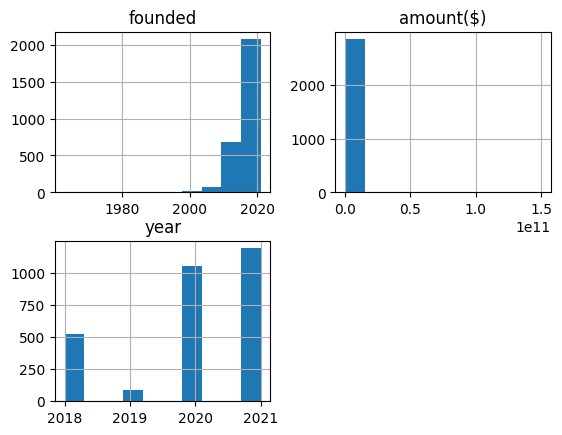

In [84]:
final_dataset.hist()

#### Testing the Hypothesis

In [85]:
startups_in_bangalore = final_dataset[final_dataset['headquarter']=='Bangalore']
startups_not_in_bangalore = final_dataset[final_dataset['headquarter']!='Bangalore']

####
- Mann-Whitney U test: amount($) values are not normally distributed

In [86]:
# Perform Mann-Whitney U test
t, p = mannwhitneyu(startups_in_bangalore['amount($)'],startups_not_in_bangalore['amount($)'], alternative='two-sided')

# Print the test statistic and p-value
print("Mann-Whitney U test statistic:", t)
print("P-value:", p)

Mann-Whitney U test statistic: 1003888.0
P-value: 5.640955114273794e-08


In [87]:
# Set Significance level
alpha = 0.05

#Compare p-value to the significance level
if p < alpha:
    print("We reject the null hypothesis. Which is there is no significant difference in the amount of funding between startups in Bangalore.")
else:
   print("We failed to reject the null hypothesis. There is a significant difference in the amount of funding between startups in Bangalore.")

We reject the null hypothesis. Which is there is no significant difference in the amount of funding between startups in Bangalore.


In [88]:
final_dataset.describe(include="all")

,company_brand,founded,headquarter,sector,what_it_does,investor,amount($),stage,year
count,2856,2856.0,2856,2856,2856,2856,2.856000e+03,2856,2856.000000
unique,2133,<NA>,127,80,2691,1453,NaN,54,NaN
top,Byju's,<NA>,Bangalore,Technology,BYJU'S is an educational technology company th...,Inflection Point Ventures,NaN,Venture - Series Unknown,NaN
freq,11,<NA>,924,918,5,304,NaN,970,NaN
mean,NaN,2016.039566,NaN,NaN,NaN,NaN,9.849421e+07,NaN,2020.017857
std,NaN,3.73653,NaN,NaN,NaN,NaN,3.097961e+09,NaN,1.087759
min,NaN,1963.0,NaN,NaN,NaN,NaN,8.789400e+02,NaN,2018.000000
25%,NaN,2015.0,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020.000000
50%,NaN,2016.0,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020.000000
75%,NaN,2018.0,NaN,NaN,NaN,NaN,8.000000e+06,NaN,2021.000000


In [89]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2856 non-null   Int32  
 2   headquarter    2856 non-null   object 
 3   sector         2856 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   investor       2856 non-null   object 
 6   amount($)      2856 non-null   float64
 7   stage          2856 non-null   object 
 8   year           2856 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(6)
memory usage: 203.6+ KB


In [90]:
final_dataset.isna().sum()

company_brand    0
founded          0
headquarter      0
sector           0
what_it_does     0
investor         0
amount($)        0
stage            0
year             0
dtype: int64

### Exploratory Data Analysis (EDA)

In [91]:
# final_dataset.describe()

- **Founded Year**: The startups in the dataset were founded between 1963 and 2021, with an average founding year of approximately 2016. The majority of startups were founded after 2015.

- **Funding Amount**: The funding amounts range from $878.94 to $150 billion, with an average funding amount of around $98.5 million. However, there is a notable standard deviation of approximately $3.1 billion, indicating significant variance in funding received among startups.

- **Year**: The dataset spans from 2018 to 2021, with most startups receiving funding in 2020 and 2021. The median funding year is also 2020.

### Univariate Analysis

Numerical


In [92]:
# Summary statistics for numerical columns
numerical_summary = final_dataset.describe()
# Create a figure with subplots for each numerical column
fig = make_subplots(rows=1, cols=len(numerical_summary.columns) - 1, subplot_titles=numerical_summary.columns[1:])
# Iterate over numerical columns and add histograms to subplots
for i, column in enumerate(numerical_summary.columns[1:], start=1):  # Start from the second column
    fig.add_trace(go.Histogram(x=final_dataset[column], nbinsx=20, name=column), row=1, col=i)

# Update the layout
fig.update_layout(title='Distribution of Numerical Columns',
                  xaxis_title='Value',
                  yaxis_title='Frequency',
                  height=400,  # Set the height of the figure
                  width=900)  # Set the width of the figure

# Show the plot 
fig.show()


Categorical

In [93]:
# Create a count plot for Sector using Plotly Express
fig = px.histogram(final_dataset, x='sector', title='Count of Startups in Each Sector')

# Update layout
fig.update_layout(xaxis_title='Sector', yaxis_title='Count', barmode='group',height =400, width = 800)

# Show the plot
fig.show()


### Bivariate


Numerical-Numerical relationship


In [94]:
# Create a scatter plot using Plotly Express
fig = px.scatter(final_dataset, x='year', y='amount($)', title='Amount($) vs. Funding Year',
                 labels={'year': 'Funding Year', 'amount($)': 'Amount($)'})

# Customize the layout
fig.update_layout(xaxis_title='Funding Year', yaxis_title='Amount($)', xaxis_tickangle=-45, height =400, width = 800)

# Show the plot
fig.show()


Numerical-Categorical

In [95]:
# Create the box plot using Plotly Express
fig = px.box(final_dataset, x='sector', y='amount($)', title='Amount($) Distribution Across Sectors',
             labels={'sector': 'Sector', 'amount($)': 'Amount($)'})
fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  height=400,
                  width=800)
fig.show()

### Answering the Business Questions With Visuals

####

##### Q1.What sectors have shown the highest growth in terms of funding received over the past four years?

In [96]:
year_sector_2018 = final_dataset[final_dataset['year']==2018]
year_sector_2019 = final_dataset[final_dataset['year']==2019]
year_sector_2020 = final_dataset[final_dataset['year']==2020]
year_sector_2021 = final_dataset[final_dataset['year']==2021]


# #Group 2018 data by sector and get the sum of the amount
# sector_year_funding_2018 = year_sector_2018.groupby('sector')['amount($)'].sum()/ 1e9
# sector_year_funding_2018_reset = sector_year_funding_2018.reset_index().sort_values(by='amount($)', ascending=False).head(5)

# #Group 2019 data by sector and get the sum of the amount
# sector_year_funding_2019 = year_sector_2019.groupby('sector')['amount($)'].sum()/ 1e9
# sector_year_funding_2019_reset = sector_year_funding_2019.reset_index().sort_values(by='amount($)', ascending=False).head(5)

# #Group 2020 data by sector and get the sum of the amount
# sector_year_funding_2020 = year_sector_2020.groupby('sector')['amount($)'].sum()/ 1e9
# sector_year_funding_2020_reset = sector_year_funding_2020.reset_index().sort_values(by='amount($)', ascending=False).head(5)

# #Group 2021 data by sector and get the sum of the amount
# sector_year_funding_2021 = year_sector_2021.groupby('sector')['amount($)'].sum()/ 1e9
# sector_year_funding_2021_reset = sector_year_funding_2021.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#### Visualizing

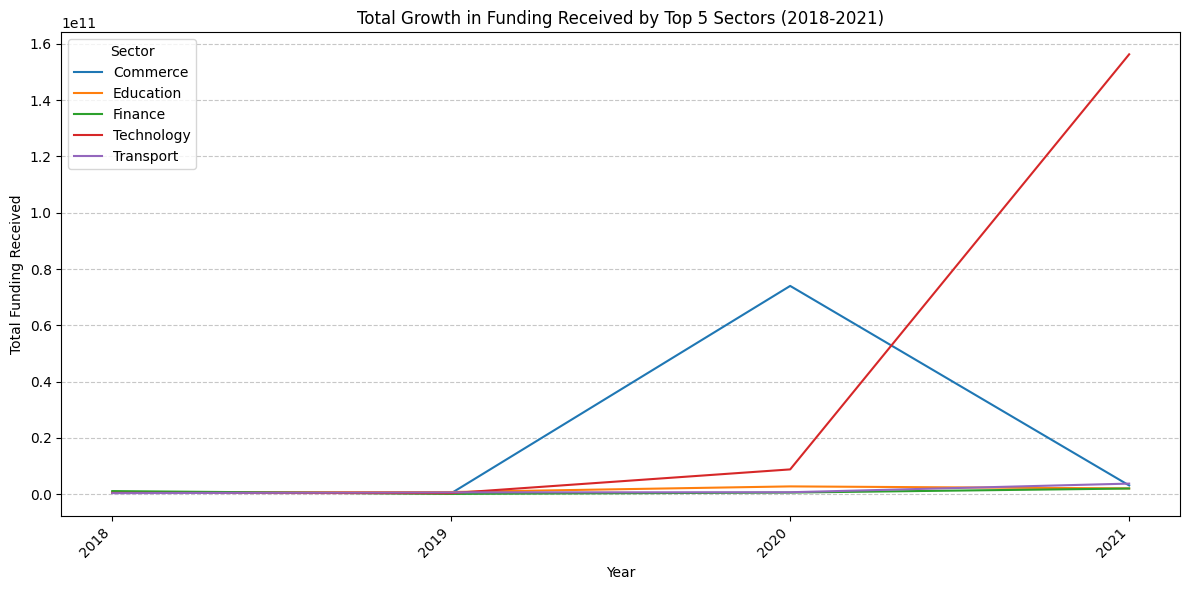

In [131]:
data = final_dataset.groupby(['sector', 'year'])['amount($)'].sum().reset_index()

# Calculate total funding received by each sector
total_funding = data.groupby('sector')['amount($)'].sum()

# Get top 5 sectors by total funding
top_5_sectors = total_funding.nlargest(5).index

# Filter the grouped data for only the top 5 sectors
top_5_growth = data[data['sector'].isin(top_5_sectors)]

# Pivot the table to have sectors as rows and years as columns
pivot_table = top_5_growth.pivot(index='year', columns='sector', values='amount($)')

# Plot the total funding received for each sector over the years (line plot)
pivot_table.plot(kind='line', figsize=(12, 6))
plt.title('Total Growth in Funding Received by Top 5 Sectors (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Received')
plt.xticks(rotation=45, ha='right')
plt.xticks(np.arange(min(pivot_table.index), max(pivot_table.index)+1, 1))  # Set integer ticks for years
plt.legend(title='Sector')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Summary on the visualizations

#####

- **Commerce**: The commerce sector increased steadily until around mid-2020 ,where there was a sharp rise. but saw a decline afterwards. This could be due to a shift in investment focus or changes in the commerce landscape.

- **Education**: The education sector experienced a steady increase in funding until around mid-2019. However, there was a decline afterwards. This could be due to a shift in investment focus or changes in the education landscape.

- **Finance**: The finance sector’s funding remained relatively stable with slight fluctuations. This suggests a steady interest in financial technologies and services.

- **Technology**: The technology sector had stable funding but at a lower level compared to finance. However, there's a noticeable spike in 2020. This could be due to significant technological advancements or breakthroughs that attracted more investments. It could also be a result of increased reliance on technology due to the global circumstances in 2020, such as the shift to remote work and online services amidst the COVID-19 pandemic.

- **Transport**: The transport sector’s funding peaked around mid-2019 and then sharply declined. This could be due to changes in transportation needs or challenges in the industry.

##### Q2.What locations within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

##### First answering Locations with higest investment

In [98]:
# Grouping the dataset based on the headquarters
startups_by_location = final_dataset.groupby('headquarter')['amount($)'].sum()
# Reset the index before assigning column names
top_10_locations_by_investment = startups_by_location.reset_index().sort_values(by ='amount($)', ascending = False).head(10)
top_10_locations_by_investment['growth_billions'] = top_10_locations_by_investment['amount($)'] / 1e9

# Assign column names
top_10_locations_by_investment.columns = ['headquarter', 'amount($)', 'growth_billions']
# Add a column for the rank
top_10_locations_by_investment['rank'] = top_10_locations_by_investment.reset_index().index + 1

In [99]:
# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to retrieve coordinates for a location
def get_coordinates(location):
    try:
        location_info = geolocator.geocode(location)
        if location_info:
            return location_info.latitude, location_info.longitude
        else:
            print(f"Warning: Coordinates not found for {location}. Skipping.")
            return None, None
    except Exception as e:
        print(f"Error retrieving coordinates for {location}: {str(e)}")
        return None, None

#####
 The **get_coordinates()** function serves to retrieve latitude and longitude coordinates for a specified location using the Nominatim geocoding service. Given a location string as input, the function queries the geocoder to obtain location information. If successful, it extracts and returns the latitude and longitude coordinates from the retrieved data. In cases where the geocoder fails to find coordinates for the given location, the function issues a warning. Additionally, any encountered errors during the retrieval process are logged for debugging purposes.

In [100]:
# Apply the function to get coordinates for each location
top_10_locations_by_investment[['Latitude', 'Longitude']] = top_10_locations_by_investment['headquarter'].apply(lambda x: pd.Series(get_coordinates(x)))
top_10_locations_by_investment

,headquarter,amount($),growth_billions,rank,Latitude,Longitude
73,Mumbai,2.311084e+11,231.108427,1,19.078545,72.878176
9,Bangalore,2.555057e+10,25.550574,2,12.976794,77.590082
41,Gurugram,5.487438e+09,5.487438,3,28.464615,77.029919
76,New Delhi,3.600349e+09,3.600349,4,28.613895,77.209006
20,California,3.081300e+09,3.081300,5,36.701463,-118.755997
40,Gurgaon,1.462202e+09,1.462202,6,28.428262,77.002700
89,Pune,1.354979e+09,1.354979,7,18.521428,73.854454
22,Chennai,1.181153e+09,1.181153,8,13.083694,80.270186
27,Delhi,9.798537e+08,0.979854,9,28.627393,77.171695
43,Haryana,9.379950e+08,0.937995,10,29.000000,76.000000


#### Visualizing

In [101]:
# Create a map centered around the first location
map_top_10_locations_by_investment= folium.Map(location=[top_10_locations_by_investment['Latitude'].iloc[0], top_10_locations_by_investment['Longitude'].iloc[0]], zoom_start=3)
marker_cluster = MarkerCluster().add_to(map_top_10_locations_by_investment)

# Add a marker for each location to the MarkerCluster
for idx, row in top_10_locations_by_investment.iterrows():
    radius = int(row['growth_billions'] / 1e9)
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(('<strong><font color ="green">'+row['headquarter']+'</font></strong><br>'+
                            '<strong>Total Investment (Billions): </strong><font color ="blue">'+str(row['growth_billions'])+'</font><br>'), max_width=250),
        icon=folium.DivIcon(html=f"<div style='font-size: 12pt; color: red;'>{row['rank']}</div>")
    ).add_to(marker_cluster)

# Display the map
map_top_10_locations_by_investment

##### Secondly answering Locations with higest number of start ups

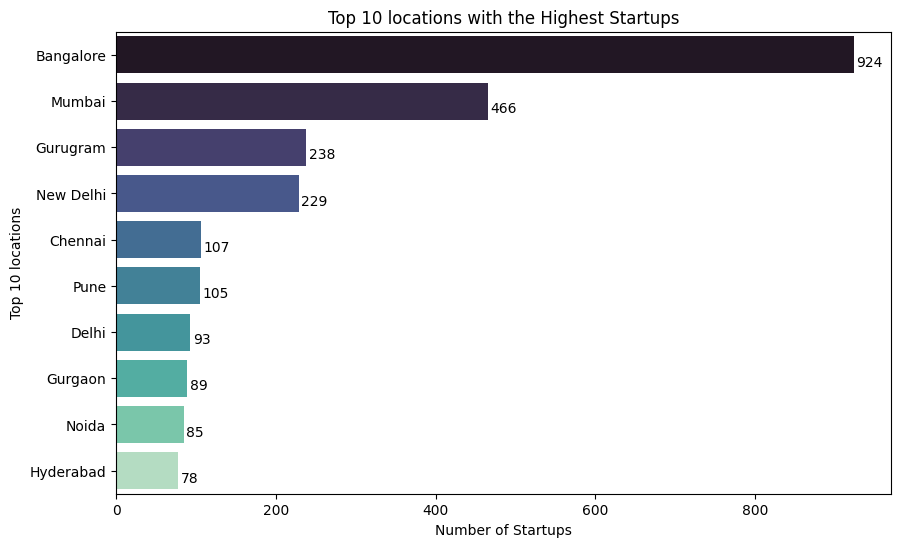

In [102]:
startups_by_location2 = final_dataset['headquarter'].value_counts()

# Reset index and get the top 10 locations
top_10_locations2 = startups_by_location2.head(10).sort_values(ascending=False).reset_index()
top_10_locations2.columns = ['headquarter', 'count']


# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='headquarter', data=top_10_locations2, palette="mako")

# Add the numbers near the bars
for i, v in enumerate(top_10_locations2['count']):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='light')

plt.title('Top 10 locations with the Highest Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Top 10 locations')
plt.show()

#### Summary on the visualizations

######
- Bangalore is the leading hub with 866 startups. Bangalore, often referred to as the “Silicon Valley of India”, is known for its tech-savvy talent pool, vibrant ecosystem, and presence of numerous tech giants and venture capitalists.

- Mumbai, with 466 startups, is the second major hub. As the financial capital of India, Mumbai offers a robust financial infrastructure and access to a diverse market.

- Gurugram ranks third with 238 startups. Its proximity to the national capital, New Delhi, and favorable government policies make it an attractive destination for startups.

- New Delhi itself is home to 229 startups, benefiting from its status as the capital city and its vast network of investors and companies.

The factors contributing to the prominence of these locations could include availability of skilled workforce, infrastructure, ease of doing business, presence of investors, and supportive government policies. 

######
It’s interesting to note that while Bangalore leads in the number of startups, it’s Mumbai that attracts the highest average funding. This could be due to a variety of factors such as the nature of startups in each city, the presence of investors, market opportunities, etc.

In conclusion, both Bangalore and Mumbai have emerged as significant hubs for startup activity and investment in India, each with its own strengths - Bangalore with its sheer number of startups, and Mumbai with its higher average funding.

##### Q3. Are there any notable differences in funding patterns between early-stage startups and more established companies?

In [103]:
#Getting the median year for the founded coulmn
overall_median_per_year  # The overall median year is 2016

final_dataset['stage_of_startup'] = np.where(final_dataset['founded'] >= overall_median_per_year, 'Early Stage', 'Established')

In [104]:
# Display the count of each category in the 'stage' column
stage_distribution = final_dataset['stage_of_startup'].value_counts()

# Print or visualize the distribution
print(stage_distribution)

stage_of_startup
Early Stage    2074
Established     782
Name: count, dtype: int64


#### Descriptive Stats on the two categories i.e Eary Stage and Established

In [105]:
early_stage_startups = final_dataset[final_dataset['stage_of_startup'] == 'Early Stage']['amount($)'].describe()
established_startups = final_dataset[final_dataset['stage_of_startup'] == 'Established']['amount($)'].describe()

print("Early Stage Funding Statistics:")
print(early_stage_startups)

print("\nEstablished Funding Statistics:")
print(early_stage_startups)

Early Stage Funding Statistics:
count    2.074000e+03
mean     8.398805e+07
std      3.293778e+09
min      8.789400e+02
25%      1.000000e+06
50%      3.000000e+06
75%      5.000000e+06
max      1.500000e+11
Name: amount($), dtype: float64

Established Funding Statistics:
count    2.074000e+03
mean     8.398805e+07
std      3.293778e+09
min      8.789400e+02
25%      1.000000e+06
50%      3.000000e+06
75%      5.000000e+06
max      1.500000e+11
Name: amount($), dtype: float64


####
**Mean Funding Amount:** Early-stage companies have a slightly lower mean funding amount ($83.88 million) compared to established companies ($136.97 million).

**Variability (Standard Deviation):** Both groups exhibit high variability in funding amounts, as indicated by the large standard deviations.

**Minimum and Maximum Funding:** Both groups have a wide range of funding amounts, with early-stage companies having a minimum of $720 and a maximum of $150 billion, while established companies range from $40,900 to $70 billion.

**Percentiles (Q1, Median, Q3):** Early-stage companies generally have lower funding amounts at each percentile compared to established companies.

#### Visualizing

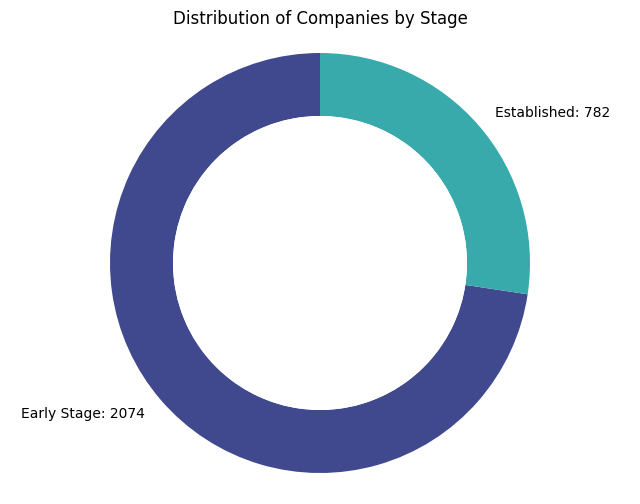

In [106]:
# Calculate the count of companies by stage
stage_counts = final_dataset['stage_of_startup'].value_counts()

# Set up the data for the donut chart
labels = stage_counts.index
sizes = stage_counts.values

# Set up colors
colors = sns.color_palette('mako', len(labels))

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle at the center of the donut to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add count and percentage labels
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    autotext.set_color('white') 
    autotext.set_fontweight('bold') 
    text.set_text(f'{labels[i]}: {sizes[i]}')
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add title
plt.title('Distribution of Companies by Stage')

# Show the plot
plt.show()

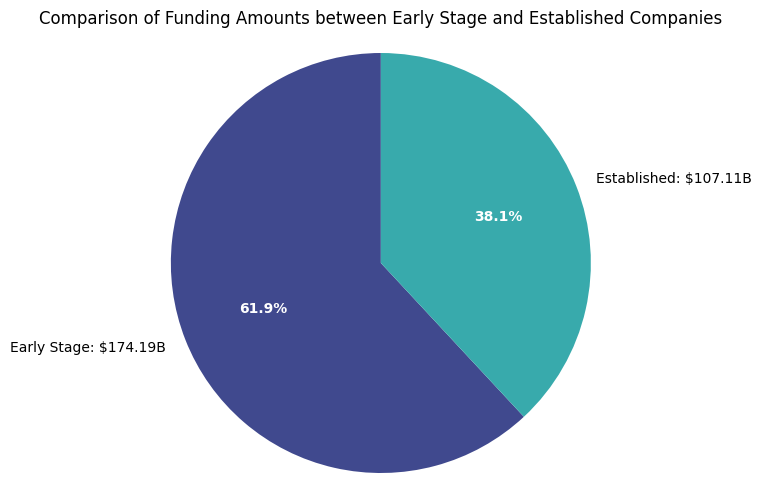

In [107]:
# Calculate the total funding amounts for each stage
stage_funding = final_dataset.groupby('stage_of_startup')['amount($)'].sum()

# Set up the data for the pie chart
labels = stage_funding.index
sizes = stage_funding.values

# Set up colors
colors = sns.color_palette('mako', len(labels))

# Create a pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add funding amounts to labels
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    autotext.set_color('white')  # Change the color of the percentage text to white
    autotext.set_fontweight('bold')  # Make the percentage text bold
    text.set_text(f'{labels[i]}: ${sizes[i]/1e9:.2f}B')  # Set the label text to include both the label and its corresponding funding amount

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Comparison of Funding Amounts between Early Stage and Established Companies')

# Show the plot
plt.show()


#### Summary on the visualizations

- Number of Startups: The first chart shows a higher number of early-stage startups compared to established ones, possibly due to new ideas and available seed funding.

- Investment in Funding: The second chart reveals that early-stage companies attract more funding, suggesting investor confidence in innovative ventures.

In conclusion, the data reflects a dynamic startup ecosystem with abundant funding for emerging companies, although early-stage ventures carry higher risk.

##### Q4. Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India

##### First answering sectors with higest funding

In [127]:
# Group data by sector and get the sum of the amount
sector_year_funding = final_dataset.groupby('sector')['amount($)'].sum()
sector_year_funding_reset = sector_year_funding.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#### Visualizing

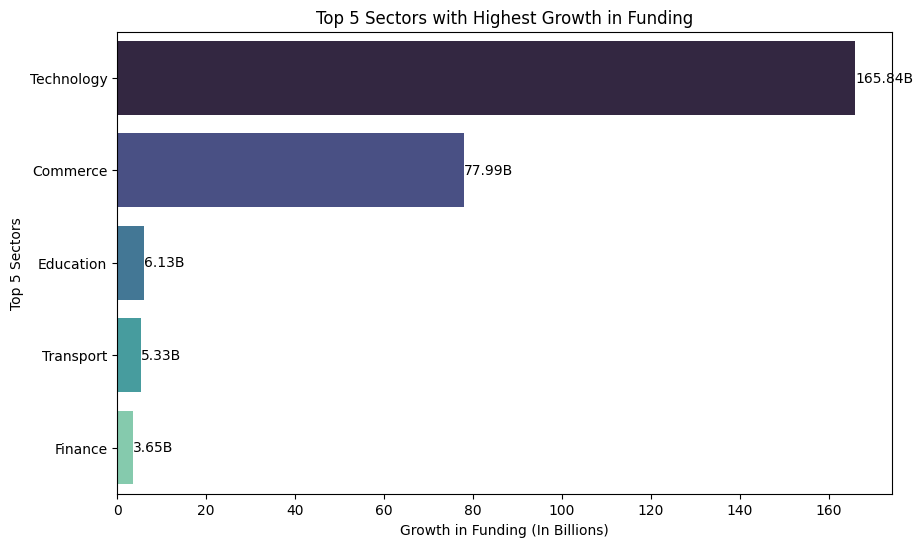

In [128]:
# Convert the 'growth' values to billions
sector_year_funding_reset['growth_billions'] = sector_year_funding_reset['amount($)'] / 1e9
def annotate_bars(data, ax):
    for index, value in enumerate(data['growth_billions']):
        ax.text(value, index, f'{value:.2f}B', ha='left', va='center', fontsize=10)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='growth_billions', y='sector', data=sector_year_funding_reset, palette="mako")

plt.title('Top 5 Sectors with Highest Growth in Funding')
plt.xlabel('Growth in Funding (In Billions)')
plt.ylabel('Top 5 Sectors')

# Annotate the bars with values
annotate_bars(sector_year_funding_reset, ax)
plt.show()

##### Secondly answering sectors with lowest funding

In [129]:
#Group data by sector and get the sum of the amount
sector_year_funding = final_dataset.groupby('sector')['amount($)'].sum()
sector_year_funding_reset = sector_year_funding.reset_index().sort_values(by='amount($)', ascending=False).tail(5)

#### Visualizing

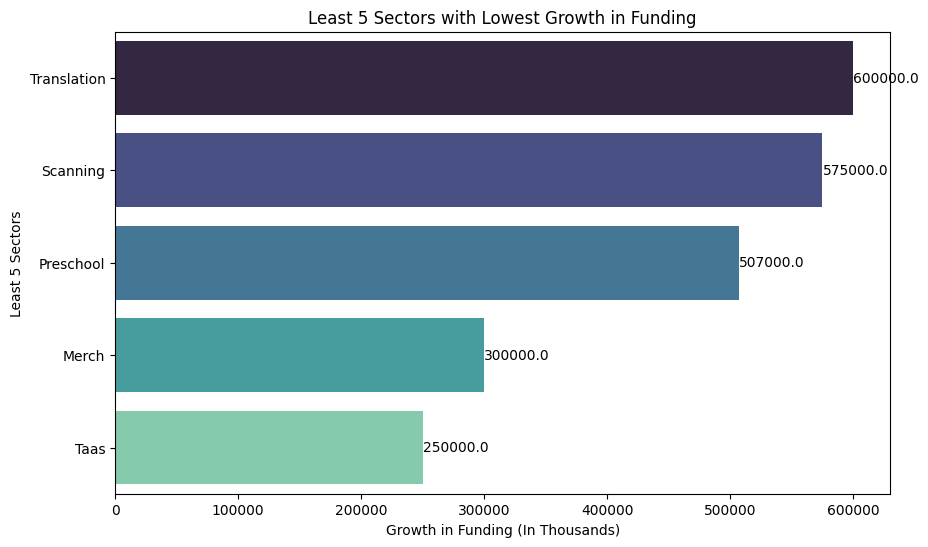

In [130]:
def annotate_bars(data, ax):
    for index, value in enumerate(data['amount($)']):
        ax.text(value, index, f'{value:.1f}', ha='left', va='center', fontsize=10)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='amount($)', y='sector', data=sector_year_funding_reset, palette="mako")

annotate_bars(sector_year_funding_reset,ax)
plt.title('Least 5 Sectors with Lowest Growth in Funding')
plt.xlabel('Growth in Funding (In Thousands)')
plt.ylabel('Least 5 Sectors')
plt.show()

#### Summary on the visualizations

- The first graph shows the distribution of startups across different sectors. It indicates that there are significantly more startups in the Technology, Commerce, Education, Transport, and Finance sectors. This could be due to various factors such as market demand, technological advancements, and the availability of skilled workforce in these sectors.

- The second graph compares the funding amounts received by different sectors. It shows that the Translation, Scanning, Preschool, and Merch sectors have received the least funding. This could suggest that these sectors are either emerging or not as attractive to investors as the sectors in the first graph.

In conclusion, the number of startups and the amount of funding received are important indicators of the health and growth potential of a sector. While some sectors have a high number of startups and attract more funding, others may be emerging sectors with potential for future growth.

##### Q5. Which investors have more impact on startups over the years?

#### Visualizing

In [112]:
#Group 2018 data by investor and get the sum of the amount
investor_year_funding_2018 = year_sector_2018.groupby('investor')['amount($)'].sum()/ 1e9
investor_year_funding_2018_reset = investor_year_funding_2018.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#Group 2019 data by investor and get the sum of the amount
investor_year_funding_2019 = year_sector_2019.groupby('investor')['amount($)'].sum()/ 1e9
investor_year_funding_2019_reset = investor_year_funding_2019.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#Group 2020 data by sector and get the sum of the amount
investor_year_funding_2020 = year_sector_2020.groupby('investor')['amount($)'].sum()/ 1e9
investor_year_funding_2020_reset = investor_year_funding_2020.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#Group 2021 data by sector and get the sum of the amount
investor_year_funding_2021 = year_sector_2021.groupby('investor')['amount($)'].sum()/ 1e9
investor_year_funding_2021_reset = investor_year_funding_2021.reset_index().sort_values(by='amount($)', ascending=False).head(5)


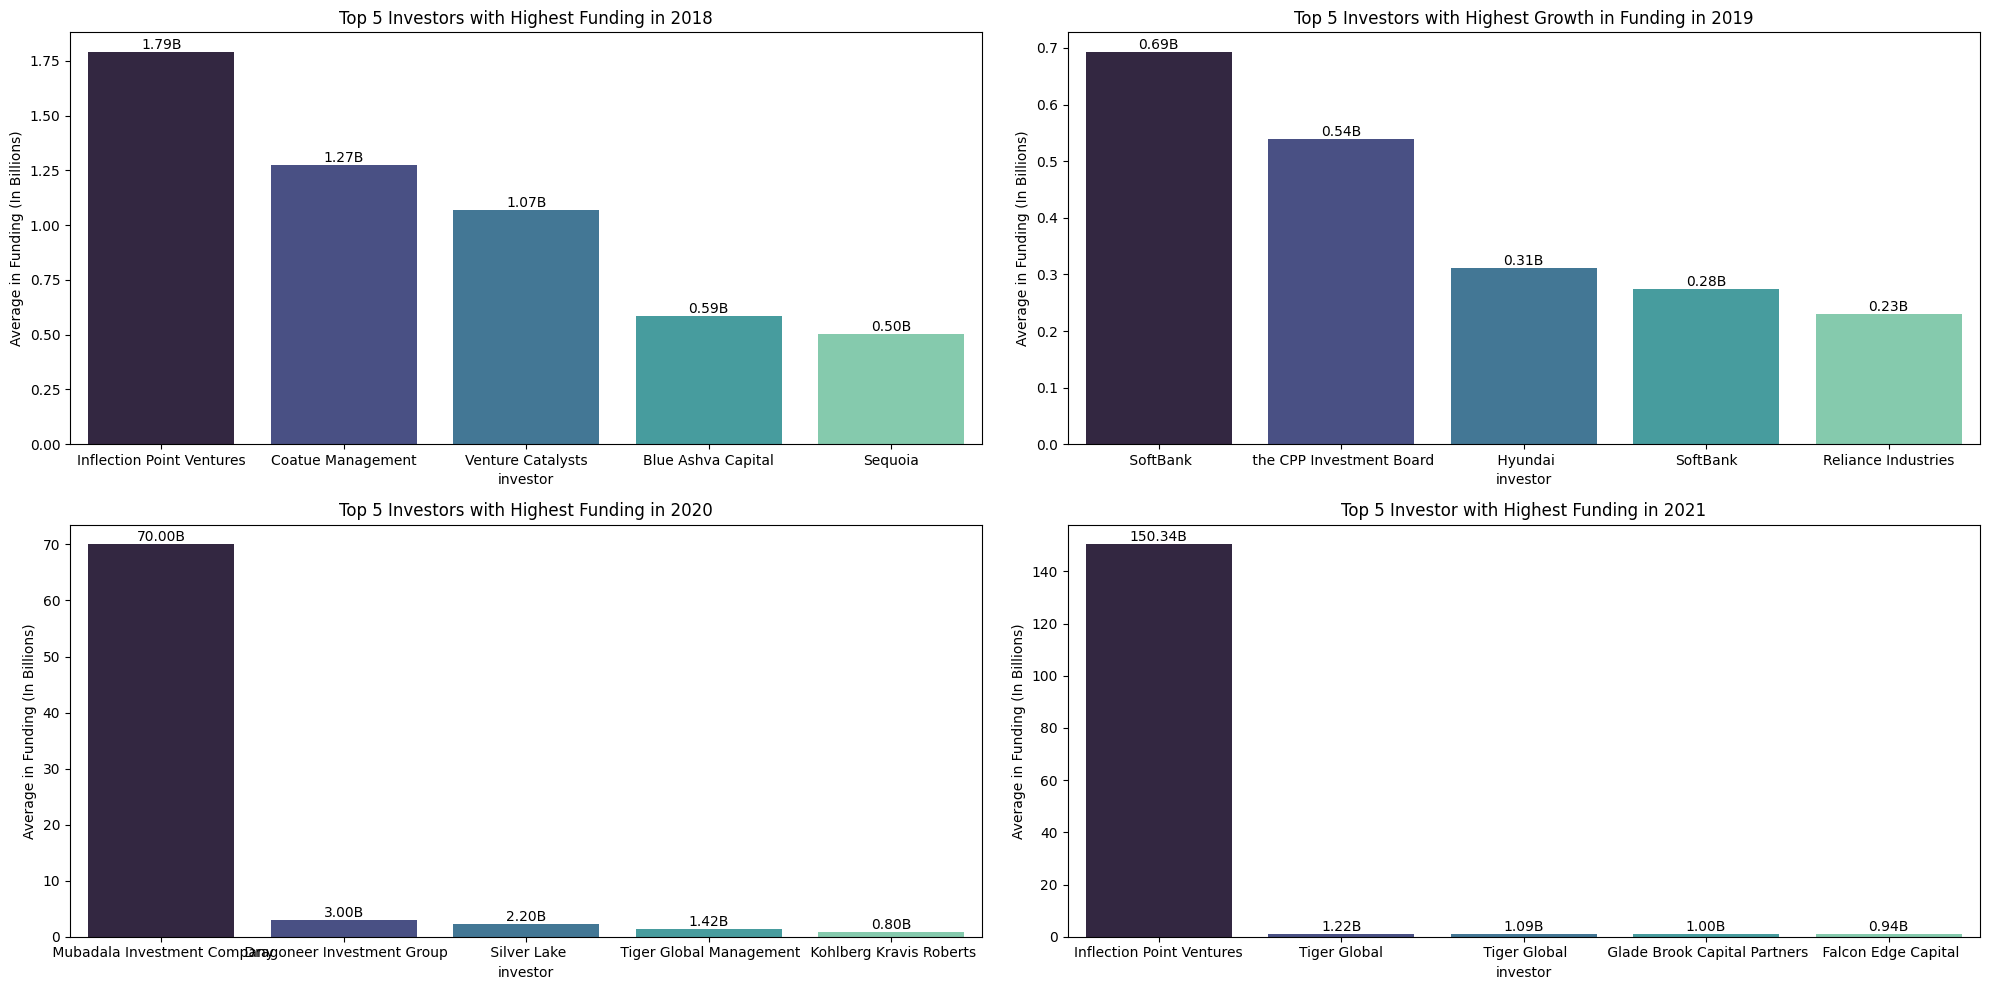

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Function to annotate each bar with the amount
def annotate_bars(data, ax):
    for index, value in enumerate(data['amount($)']):
        ax.text(index, value, f'{value:.2f}B', ha='center', va='bottom', fontsize=10)

# Plotting for 2018
sns.barplot(x='investor', y='amount($)', data=investor_year_funding_2018_reset, palette="mako", ax=axes[0, 0])
annotate_bars(investor_year_funding_2018_reset, axes[0, 0])
axes[0, 0].set_title('Top 5 Investors with Highest Funding in 2018')
axes[0, 0].set_ylabel('Average in Funding (In Billions)')


# Plotting for 2019
sns.barplot(x='investor', y='amount($)', data=investor_year_funding_2019_reset, palette="mako", ax=axes[0, 1])
annotate_bars(investor_year_funding_2019_reset, axes[0, 1])
axes[0, 1].set_title('Top 5 Investors with Highest Growth in Funding in 2019')
axes[0, 1].set_ylabel('Average in Funding (In Billions)')

# Plotting for 2020
sns.barplot(x='investor', y='amount($)', data=investor_year_funding_2020_reset, palette="mako", ax=axes[1, 0])
annotate_bars(investor_year_funding_2020_reset, axes[1, 0])
axes[1, 0].set_title('Top 5 Investors with Highest Funding in 2020')
axes[1, 0].set_ylabel('Average in Funding (In Billions)')

# Plotting for 2021
sns.barplot(x='investor', y='amount($)', data=investor_year_funding_2021_reset, palette="mako", ax=axes[1, 1])
annotate_bars(investor_year_funding_2021_reset, axes[1, 1])
axes[1, 1].set_title('Top 5 Investor with Highest Funding in 2021')
axes[1, 1].set_ylabel('Average in Funding (In Billions)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### Summary on the visualizations

#####
In 2018, Infection Point Ventures was the leading investor. However, in 2019, SoftBank took the lead with a significant increase in funding. Mubadala Investment Company surged ahead in 2020 with an impressive funding amount. In 2021, Inflection Point Ventures regained prominence as the top investor. 

The leading investor changed each year from 2018 to 2021, which underscores the dynamic and competitive nature of startup investment. It highlights that the startup investment landscape is continually evolving, with no single investor consistently dominating over the years.

##### Q6. What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

#####
- Sector: Successful startups often thrive in sectors experiencing significant growth in funding. Sectors such as Technology, Commerce, Education, Transport, and Finance have attracted substantial investment, indicating investor confidence in their growth potential. In contrast, startups in sectors like Translation, Scanning, Preschool, and Merch have received less funding, suggesting lower investor interest in these areas.

- Stage: Early-stage startups have a higher likelihood of securing funding compared to established companies. Investors are often attracted to new, innovative ventures with high growth potential. This trend is evident in the funding distribution, where early-stage startups receive more investment compared to their established counterparts.

- Location: The location of a startup plays a crucial role in its ability to attract investment. Thriving startup ecosystems, such as those in Mumbai and Bangalore, offer access to a supportive network of investors, talent, and resources. Startups located in these hubs have a competitive advantage in securing funding compared to those in regions with less-developed startup ecosystems.
